In [53]:
data=pd.read_csv(r"/Users/vincentwakim/Documents/DAFT_0116/module_2/Project_Week_4/Group 4 Elon_s Tweets/ElonTweets(Sentiment)_10-28-22.csv")

In [54]:
data

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0                   Datetime  \
0                 0             0           0  2022-10-28 03:49:11+00:00   
1                 1             1           1  2022-10-28 01:50:49+00:00   
2                 2             2           2  2022-10-27 21:45:47+00:00   
3                 3             3           3  2022-10-27 16:17:39+00:00   
4                 4             4           4  2022-10-27 13:19:25+00:00   
...             ...           ...         ...                        ...   
17440         17440         17440       17440  2011-12-03 08:22:07+00:00   
17441         17441         17441       17441  2011-12-03 08:20:28+00:00   
17442         17442         17442       17442  2011-12-01 10:29:04+00:00   
17443         17443         17443       17443  2011-12-01 09:55:11+00:00   
17444         17444         17444       17444  2010-06-04 18:31:57+00:00   

                  Tweet Id                                               Text  \
0      1585841080431321088                                  the bird is freed   
1      1585811291851018241  Falcon rockets to orbit as seen from LA https:...   
2      1585749627365515266                                @Gfilche @Twitter ðŸ¤£   
3      1585667048020901888                              @PeterSchiff ðŸ¤£ thanks   
4      1585622194696044544                              @ZubyMusic Absolutely   
...                    ...                                                ...   
17440   142881284019060736                  That was a total non sequitur btw   
17441   142880871391838208  Great Voltaire quote, arguably better than Twa...   
17442   142188458125963264  I made the volume on the Model S http://t.co/w...   
17443   142179928203460608  Went to Iceland on Sat to ride bumper cars on ...   
17444          15434727182  Please ignore prior tweets, as that was someon...   

       Username    location  reply count  retweet count  like count language  \
0      elonmusk  Twitter HQ        57663         128631      730472       en   
1      elonmusk  Twitter HQ         6857          16499      189436       en   
2      elonmusk  Twitter HQ          632            246        7052      und   
3      elonmusk  Twitter HQ          670            420       17577       en   
4      elonmusk  Twitter HQ         1281           1152       42896       en   
...         ...         ...          ...            ...         ...      ...   
17440  elonmusk  Twitter HQ           27              9          51       en   
17441  elonmusk  Twitter HQ           23             29          53       en   
17442  elonmusk  Twitter HQ           29             13          75       en   
17443  elonmusk  Twitter HQ           33             22         188       en   
17444  elonmusk  Twitter HQ          988            558        6023       en   

      Twitter Access Point  Follower Count   Friends Count  verified  \
0       Twitter for iPhone       110553384             122      True   
1       Twitter for iPhone       110553384             122      True   
2       Twitter for iPhone       110553384             122      True   
3       Twitter for iPhone       110553384             122      True   
4       Twitter for iPhone       110553384             122      True   
...                    ...             ...             ...       ...   
17440   Twitter for iPhone       110555351             122      True   
17441   Twitter for iPhone       110555351             122      True   
17442   Twitter Web Client       110555351             122      True   
17443   Twitter Web Client       110555351             122      True   
17444   Twitter Web Client       110555351             122      True   

             Date         mentions                 sentiment  
0      2022-10-28                _  ['positive', 0.70848316]  
1      2022-10-28                _   ['neutral', 0.90077394]  
2      2022-10-27  Gfilche,Twitter    ['neutral', 0.5714027]  
3      2022-10-27      PeterSchiff  [

In [6]:
import pandas as pd
FILES = ['ElonTweets(Sentiment)_10-28-22.csv', 'ElonTweets(Sentiment).csv', 'ElonTweets(Sentiment)_11-9-22.csv']
df = pd.concat([pd.read_csv(f) for f in FILES], ignore_index = True)
assert (df.groupby('Tweet Id').agg({'sentiment' : set}).sentiment.apply(len) == 1).all()
df = df.drop_duplicates('Tweet Id')

df = df.drop(columns = [col for col in df.columns if 'Unnamed' in col])
def parse_sentiment(value):
    sentiment, proba = value[1:-1].split(',')
    return pd.Series([sentiment[1:-1], float(proba)])
df[['sentiment','sentiment_proba']] =df.sentiment.apply(parse_sentiment)
assert ((df.location == "Twitter HQ")| (df.location.isna())).all()

sentiment_value_dict = {
    'neutral' : 0,
    'positive' : 1,
    'negative' : -1,
}
def sentiment_to_value(sentiment):
    return sentiment_value_dict[sentiment]
assert all( value in sentiment_value_dict.keys() for value in df.sentiment.unique())
df['sentiment_value'] = df.sentiment.apply(sentiment_to_value)


df['Date'] = pd.to_datetime(df['Date'])
df['number_of_tweets'] = 1

def mention_count(mention_list):
    if mention_list == '_':
        return 0
    else:
        return 1 + mention_list.count(',')
df['number_of_mentions'] = df['mentions'].apply(mention_count)
TWEET_METRICS = ['reply count', 'retweet count', 'like count']

In [52]:
df

Datetime             Tweet Id  \
0      2022-10-28 03:49:11+00:00  1585841080431321088   
1      2022-10-28 01:50:49+00:00  1585811291851018241   
2      2022-10-27 21:45:47+00:00  1585749627365515266   
3      2022-10-27 16:17:39+00:00  1585667048020901888   
4      2022-10-27 13:19:25+00:00  1585622194696044544   
...                          ...                  ...   
35321  2022-10-28 18:10:58+00:00  1586057952678465537   
35322  2022-10-28 18:09:54+00:00  1586057687782998017   
35323  2022-10-28 13:08:13+00:00  1585981766229143552   
35324  2022-10-28 12:09:02+00:00  1585966869122457600   
35325  2022-10-28 11:41:12+00:00  1585959864454459393   

                                                    Text  Username  \
0                                      the bird is freed  elonmusk   
1      Falcon rockets to orbit as seen from LA https:...  elonmusk   
2                                    @Gfilche @Twitter ðŸ¤£  elonmusk   
3                                  @PeterSchiff ðŸ¤£ thanks  elonmusk   
4                                  @ZubyMusic Absolutely  elonmusk   
...                                                  ...       ...   
35321                                        @slashdot !  elonmusk   
35322                                   @skorusARK Cool!  elonmusk   
35323                    @WeAreCanProud First Iâ€™ve heard  elonmusk   
35324                        ðŸŽ¶ let the good times roll ðŸŽ¶  elonmusk   
35325          @catturd2 I will be digging in more today  elonmusk   

         location  reply count  retweet count  like count language  \
0      Twitter HQ        57663         128631      730472       en   
1      Twitter HQ         6857          16499      189436       en   
2      Twitter HQ          632            246        7052      und   
3      Twitter HQ          670            420       17577       en   
4      Twitter HQ         1281           1152       42896       en   
...           ...          ...            ...         ...      ...   
35321         NaN         1548           1611       31787      qam   
35322         NaN         1041            593       21339       en   
35323         NaN         3213           3846       77864       en   
35324         NaN        48131          94751      999337       en   
35325         NaN         8217          12234      197637       en   

      Twitter Access Point  Follower Count   Friends Count  verified  \
0       Twitter for iPhone       110553384             122      True   
1       Twitter for iPhone       110553384             122      True   
2       Twitter for iPhone       110553384             122      True   
3       Twitter for iPhone       110553384             122      True   
4       Twitter for iPhone       110553384             122      True   
...                    ...             ...             ...       ...   
35321   Twitter for iPhone       115238579             130      True   
35322   Twitter for iPhone       115238579             130      True   
35323   Twitter for iPhone       115238579             130      True   
35324   Twitter for iPhone       115238579             130      True   
35325   Twitter for iPhone       115238579             130      True   

            Date         mentions sentiment  sentiment_proba  sentiment_value  \
0     2022-10-28                _  positive         0.708483                1   
1     2022-10-28                _   neutral         0.900774                0   
2     2022-10-27  Gfilche,Twitter   neutral         0.571403                0   
3     2022-10-27      PeterSchiff  positive         0.789714                1   
4     2022-10-27        ZubyMusic   neutral         0.528746                0   
...          ...              ...       ...              ...              ...   
35321 2022-10-28         slashdot   neutral         0.628496                0   
35322 2022-10-28        skorusARK  positive         0.932170                1   
35323 2022-10-28    WeAreCanProud   neutral      

### Evolution of stats over time

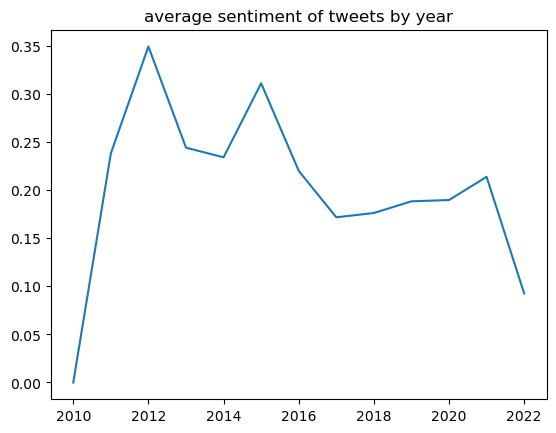

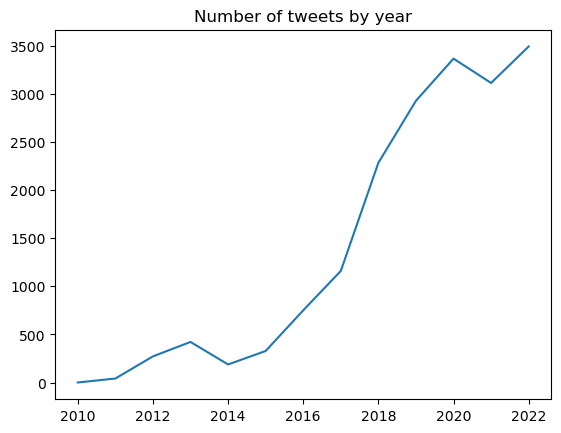

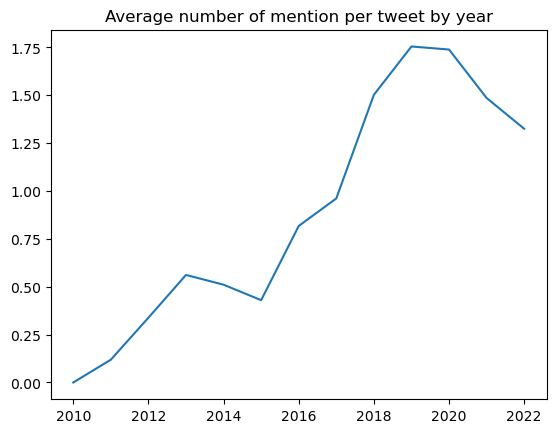

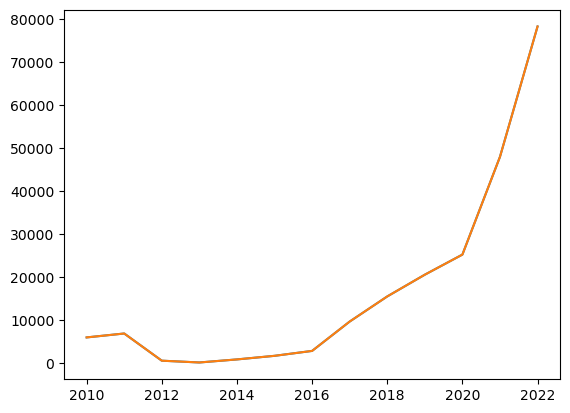

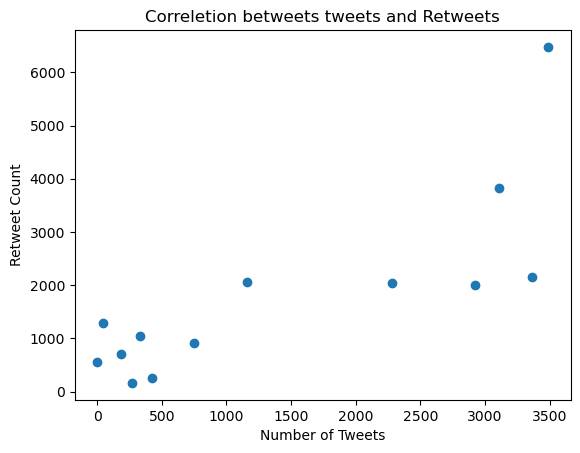

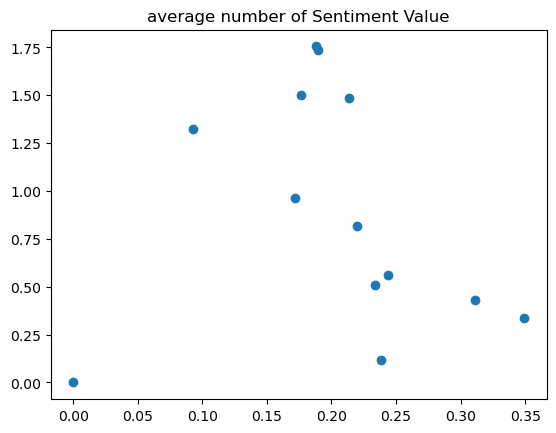

In [63]:
from matplotlib import pyplot as plt

tweets_per_year = df.groupby(df['Date'].dt.year).agg({'sentiment_value' : 'mean', 'number_of_tweets' : 'sum', 'reply count' : 'mean', 'retweet count' : 'mean', 'like count' : 'mean', 'number_of_mentions' : 'mean'})

plt.plot(tweets_per_year.index, tweets_per_year['sentiment_value'])
plt.title("average sentiment of tweets by year")
plt.show()

plt.plot(tweets_per_year.index, tweets_per_year['number_of_tweets'])
plt.title("Number of tweets by year")
plt.show()

plt.plot(tweets_per_year.index, tweets_per_year['number_of_mentions'])
plt.title("Average number of mention per tweet by year")
plt.show()

x=tweets_per_year.index
y=tweets_per_year['like count']
z=tweets_per_year['like count']
plt.plot(x, y)
plt.plot(x, z)
plt.show()




##plt.scatter(tweets_per_year.index, tweets_per_year['like count'])
##plt.plot(tweets_per_year.index, tweets_per_year['like count'])
##plt.title("average number of likes per tweet by year")
##plt.show()

plt.scatter(x=tweets_per_year['number_of_tweets'], y =tweets_per_year['retweet count'])
##plt.plot(tweets_per_year['number_of_tweets'], tweets_per_year['retweet count'])
plt.title("Correletion betweets tweets and Retweets")
plt.xlabel('Number of Tweets')
plt.ylabel('Retweet Count')
plt.show()

plt.scatter(tweets_per_year['sentiment_value'], tweets_per_year['number_of_mentions'])
##plt.plot(tweets_per_year.index, tweets_per_year['number_of_mentions'])
plt.title("average number of Sentiment Value")
plt.show()


In [36]:
tweets_per_year

sentiment_value  number_of_tweets  reply count  retweet count  \
Date                                                                  
2010         0.000000                 1   988.000000     558.000000   
2011         0.238095                42   108.047619    1295.285714   
2012         0.349265               272    41.250000     164.466912   
2013         0.244076               422    66.009479     260.969194   
2014         0.234043               188   122.936170     700.893617   
2015         0.310976               328   168.484756    1050.009146   
2016         0.220000               750   152.596000     923.906667   
2017         0.171700              1159   375.266609    2068.394305   
2018         0.176161              2282   489.531113    2038.971954   
2019         0.188312              2926   423.176008    2002.636364   
2020         0.189655              3364   787.737515    2156.661118   
2021         0.213758              3111  2898.008679    3826.345227   
2022         0.092550              3490  5031.889685    6477.466476   

        like count  number_of_mentions  
Date                                    
2010   6023.000000            0.000000  
2011   6932.690476            0.119048  
2012    615.496324            0.338235  
2013    198.971564            0.561611  
2014    909.159574            0.510638  
2015   1744.451220            0.429878  
2016   2886.604000            0.817333  
2017   9707.867127            0.961173  
2018  15546.510955            1.502191  
2019  20603.829118            1.754614  
2020  25272.162604            1.738704  
2021  48001.007715            1.485696  
2022  78287.689971            1.324928

<AxesSubplot:ylabel='retweet count'>

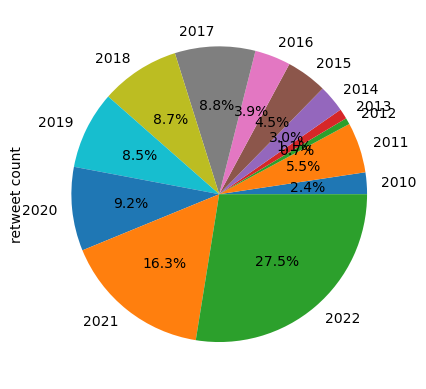

In [46]:
tweets_per_year['retweet count'].plot(kind='pie', autopct='%1.1f%%')

In [15]:
tweets_per_year

sentiment_value  number_of_tweets  reply count  retweet count  \
Date                                                                  
2010         0.000000                 1   988.000000     558.000000   
2011         0.238095                42   108.047619    1295.285714   
2012         0.349265               272    41.250000     164.466912   
2013         0.244076               422    66.009479     260.969194   
2014         0.234043               188   122.936170     700.893617   
2015         0.310976               328   168.484756    1050.009146   
2016         0.220000               750   152.596000     923.906667   
2017         0.171700              1159   375.266609    2068.394305   
2018         0.176161              2282   489.531113    2038.971954   
2019         0.188312              2926   423.176008    2002.636364   
2020         0.189655              3364   787.737515    2156.661118   
2021         0.213758              3111  2898.008679    3826.345227   
2022         0.092550              3490  5031.889685    6477.466476   

        like count  number_of_mentions  
Date                                    
2010   6023.000000            0.000000  
2011   6932.690476            0.119048  
2012    615.496324            0.338235  
2013    198.971564            0.561611  
2014    909.159574            0.510638  
2015   1744.451220            0.429878  
2016   2886.604000            0.817333  
2017   9707.867127            0.961173  
2018  15546.510955            1.502191  
2019  20603.829118            1.754614  
2020  25272.162604            1.738704  
2021  48001.007715            1.485696  
2022  78287.689971            1.324928

### Number of tweets per week, per year

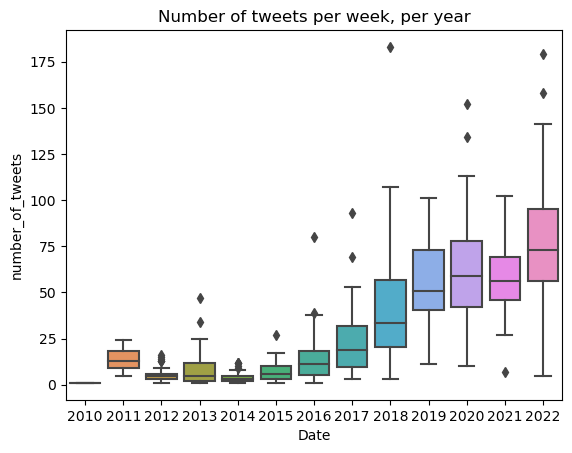

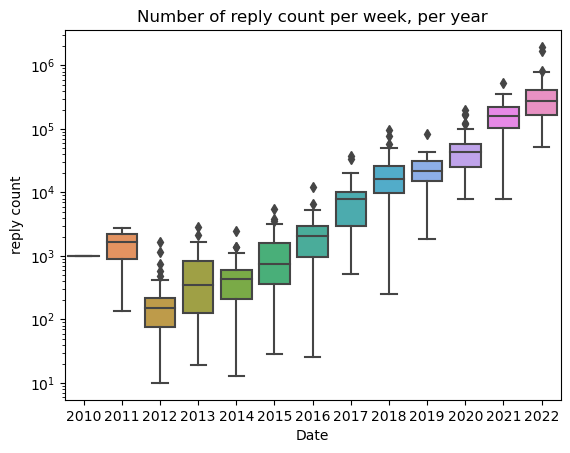

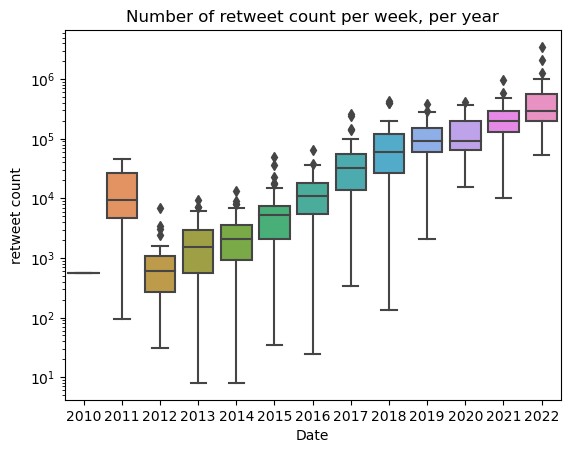

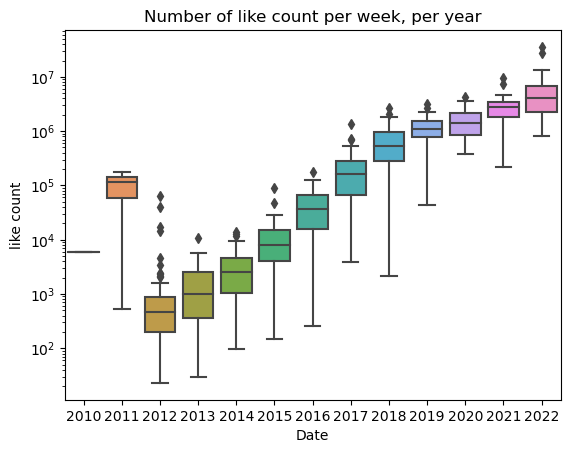

In [8]:
import seaborn as sns

df_by_week = df.groupby([df.Date.dt.year, df.Date.dt.isocalendar().week]).agg({col : 'sum' for col in[ 'number_of_tweets'] + TWEET_METRICS}).reset_index()
sns.boxplot(data = df_by_week, x = "Date", y = "number_of_tweets")
plt.title("Number of tweets per week, per year")
plt.show()

for col in TWEET_METRICS:
    sns.boxplot(data = df_by_week, x = "Date", y = col)
    plt.yscale('log')
    plt.title(f"Number of {col} per week, per year")
    plt.show()

### Sentiment distribution

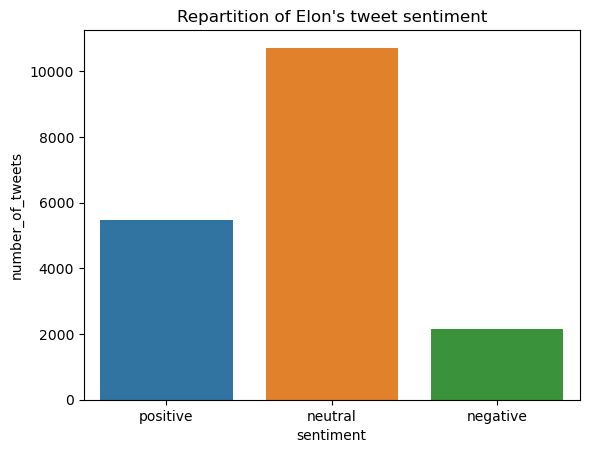

In [9]:
sns.barplot(data = df, x = 'sentiment', y = 'number_of_tweets', estimator=sum)
plt.title("Repartition of Elon's tweet sentiment")
plt.show()

### Audience reaction by tweet sentiment

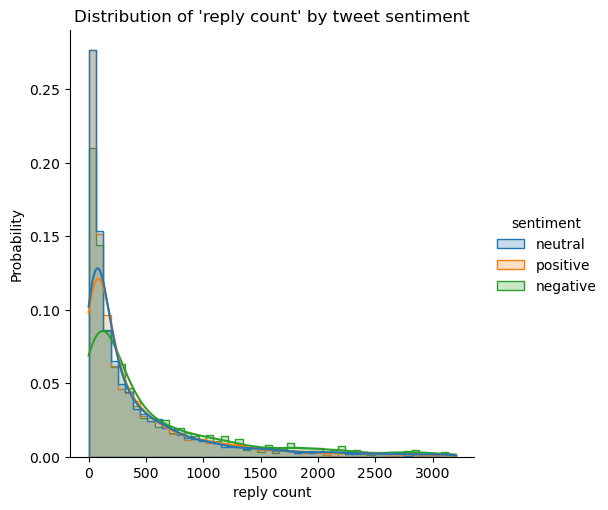

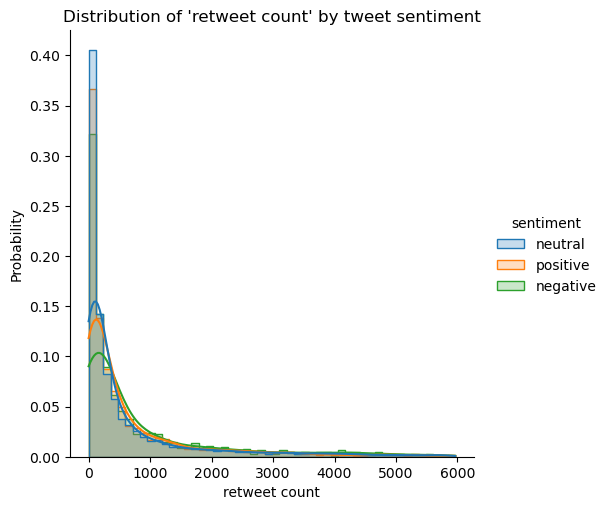

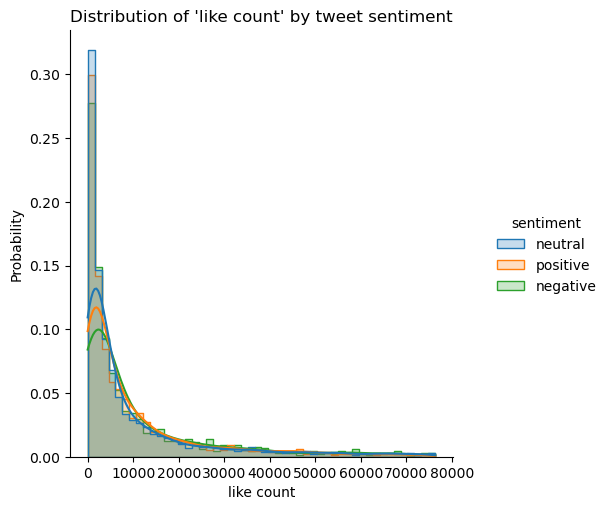

In [10]:
for col_to_show in TWEET_METRICS:
    QUANTILE_TO_KEEP = 0.90
    max_for_graph = df[col_to_show].quantile(QUANTILE_TO_KEEP)
    df_for_graph = df[df[col_to_show] < max_for_graph].copy()
    sns.displot(data = df_for_graph, x = col_to_show, hue = 'sentiment', stat = 'probability', common_norm = False,   element = "step", bins = 50, kde = True)
    plt.title(f"Distribution of '{col_to_show}' by tweet sentiment")
    plt.show()
    # We want to show what kind of tweet triggers the most reaction.
    # There doesn't seem to be a significative difference

In [11]:
# We can confirm what we saw with a correlation : 
df[['sentiment_value', 'reply count', 'retweet count', 'like count']].corr()
# sentiment_value doesn't seem to really affect relpy/RT/like count but those value seem to be very correlated.

sentiment_value  reply count  retweet count  like count
sentiment_value         1.000000    -0.046220      -0.042953   -0.032592
reply count            -0.046220     1.000000       0.730390    0.811894
retweet count          -0.042953     0.730390       1.000000    0.919679
like count             -0.032592     0.811894       0.919679    1.000000

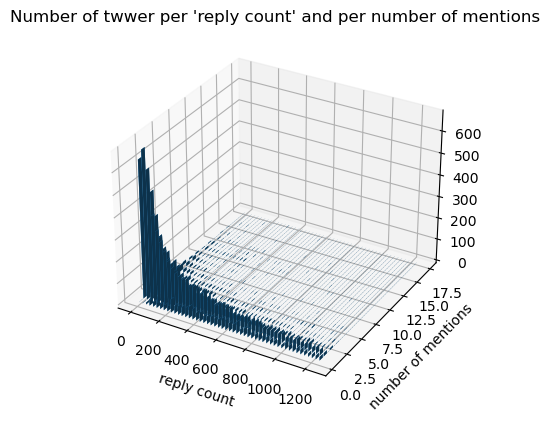

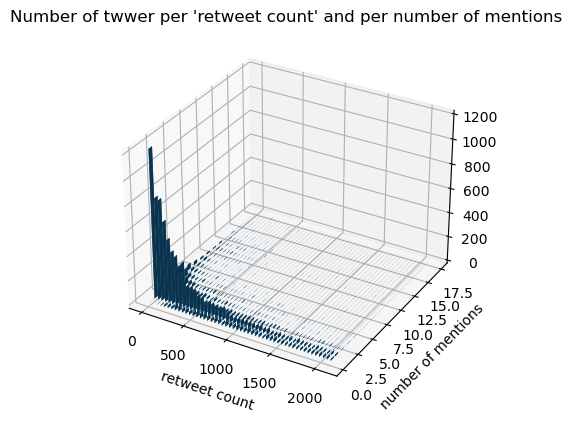

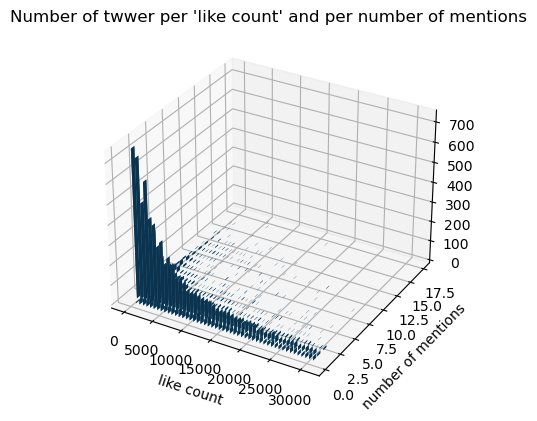

In [12]:
import numpy as np
MIN_YEAR = 2015
# we filter on later year to avoid the bias of earlier years having less mentions and less visibility
for col_to_show in ['reply count', 'retweet count', 'like count']:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    QUANTILE_TO_KEEP = 0.80
    df_filtered = df[df.Date.dt.year > MIN_YEAR]
    max_for_graph = df_filtered[col_to_show].quantile(QUANTILE_TO_KEEP)
    df_for_graph = df_filtered[(df_filtered[col_to_show] < max_for_graph) ].copy()

    hist, xedges, yedges = np.histogram2d(df_for_graph[col_to_show], df_for_graph['number_of_mentions'], bins=50, range=[[0, max_for_graph], [0, df_for_graph['number_of_mentions'].max()]])
    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    plt.title(f"Number of twwer per '{col_to_show}' and per number of mentions")
    plt.xlabel(col_to_show)
    plt.ylabel('number of mentions')
    plt.show()
# a high number of mentions do not seem to be the norm nor increase the amount of engagement.

In [61]:
# We can check our result with some correlations :
df[['number_of_mentions', 'reply count', 'retweet count', 'like count']].corr()

number_of_mentions  reply count  retweet count  like count
number_of_mentions            1.000000    -0.185155      -0.183505   -0.215007
reply count                  -0.185155     1.000000       0.730390    0.811894
retweet count                -0.183505     0.730390       1.000000    0.919679
like count                   -0.215007     0.811894       0.919679    1.000000